In [1]:
import numpy as np
from datetime import datetime

# Pandas Base 05
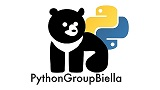

In [2]:
# Permette prints multipli in una sola cella
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd

In [3]:
index = pd.date_range('1/1/2000', periods=8)
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

a   -0.695059
b   -2.404260
c   -1.493633
d   -0.419019
e    0.840902
dtype: float64

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-02,-2.594500,-0.214147,-1.300830
2000-01-03,-0.456771,0.491060,0.385407
2000-01-04,1.021089,-0.031492,1.514765
2000-01-05,2.310499,1.154235,-0.724186
2000-01-06,-1.501048,0.755550,0.395107
2000-01-07,-0.335594,0.606702,-0.065567
2000-01-08,-0.236529,1.015687,1.115727


In [4]:
df2 = pd.DataFrame(np.random.randn(8, 3),columns=['A', 'B', 'C'])
#Creo nuova colonna con la serie index
df2["date"] = index

df2

,A,B,C,date
0,1.607400,-0.241388,-0.722700,2000-01-01
1,-0.246872,-0.571782,-1.664947,2000-01-02
2,-0.321062,-1.493691,-0.224670,2000-01-03
3,-1.217147,0.663050,-1.246787,2000-01-04
4,0.397083,0.352879,0.232573,2000-01-05
5,1.284517,0.693565,-1.437200,2000-01-06
6,-0.496591,0.523504,-2.212327,2000-01-07
7,-1.071078,1.575472,-1.011261,2000-01-08


## Indexing

### .iloc

In [5]:
# selezione su colonne
df.iloc[:,1]
type(df.iloc[:,1])

2000-01-01   -2.021989
2000-01-02   -0.214147
2000-01-03    0.491060
2000-01-04   -0.031492
2000-01-05    1.154235
2000-01-06    0.755550
2000-01-07    0.606702
2000-01-08    1.015687
Freq: D, Name: B, dtype: float64

pandas.core.series.Series

In [6]:
# selezione su colonne
df.iloc[:,[1]]
type(df.iloc[:,[1]])

,B
2000-01-01,-2.021989
2000-01-02,-0.214147
2000-01-03,0.491060
2000-01-04,-0.031492
2000-01-05,1.154235
2000-01-06,0.755550
2000-01-07,0.606702
2000-01-08,1.015687


pandas.core.frame.DataFrame

In [7]:
# selezione su righe
df.iloc[[0,2],:]

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-03,-0.456771,0.491060,0.385407


In [8]:
# selezione su righe e colonne
df.iloc[[0,2,4],[0,1]]

,A,B
2000-01-01,0.298097,-2.021989
2000-01-03,-0.456771,0.491060
2000-01-05,2.310499,1.154235


In [9]:
# Slicing: ultimi 2 elementi
df.iloc[-2:,[0,1]]

,A,B
2000-01-07,-0.335594,0.606702
2000-01-08,-0.236529,1.015687


### .loc

In [10]:
# selezione su colonne
df.loc[:,"A"]

2000-01-01    0.298097
2000-01-02   -2.594500
2000-01-03   -0.456771
2000-01-04    1.021089
2000-01-05    2.310499
2000-01-06   -1.501048
2000-01-07   -0.335594
2000-01-08   -0.236529
Freq: D, Name: A, dtype: float64

In [11]:
# selezione su colonne
df.loc[:,["A"]]

,A
2000-01-01,0.298097
2000-01-02,-2.594500
2000-01-03,-0.456771
2000-01-04,1.021089
2000-01-05,2.310499
2000-01-06,-1.501048
2000-01-07,-0.335594
2000-01-08,-0.236529


In [12]:
# selezione su righe e colonne
df.loc[[datetime(2000,1,3)], ["A", "C"]]

,A,C
2000-01-03,-0.456771,0.385407


### [ ] 

magic method \__getitem\__ (is used to implement calls like self[key])

In [13]:
df["A"] # df.loc[:,"A"]

2000-01-01    0.298097
2000-01-02   -2.594500
2000-01-03   -0.456771
2000-01-04    1.021089
2000-01-05    2.310499
2000-01-06   -1.501048
2000-01-07   -0.335594
2000-01-08   -0.236529
Freq: D, Name: A, dtype: float64

In [14]:
df[["A"]] # df.loc[:,["A"]]

,A
2000-01-01,0.298097
2000-01-02,-2.594500
2000-01-03,-0.456771
2000-01-04,1.021089
2000-01-05,2.310499
2000-01-06,-1.501048
2000-01-07,-0.335594
2000-01-08,-0.236529


In [15]:
df[["A", "B"]] #Seleziona solo per colonna

,A,B
2000-01-01,0.298097,-2.021989
2000-01-02,-2.594500,-0.214147
2000-01-03,-0.456771,0.491060
2000-01-04,1.021089,-0.031492
2000-01-05,2.310499,1.154235
2000-01-06,-1.501048,0.755550
2000-01-07,-0.335594,0.606702
2000-01-08,-0.236529,1.015687


### Indexing con array di valori booleani

#### .iloc

In [16]:
filter_ar = [True, False] * 4

In [17]:
filter_ar

[True, False, True, False, True, False, True, False]

In [18]:
df.shape

(8, 3)

In [19]:
df

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-02,-2.594500,-0.214147,-1.300830
2000-01-03,-0.456771,0.491060,0.385407
2000-01-04,1.021089,-0.031492,1.514765
2000-01-05,2.310499,1.154235,-0.724186
2000-01-06,-1.501048,0.755550,0.395107
2000-01-07,-0.335594,0.606702,-0.065567
2000-01-08,-0.236529,1.015687,1.115727


In [20]:
# filtro su righe con valori booleani
df.iloc[filter_ar, :]

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-03,-0.456771,0.491060,0.385407
2000-01-05,2.310499,1.154235,-0.724186
2000-01-07,-0.335594,0.606702,-0.065567


In [21]:
# filtro su colonne con valori booleani
df.iloc[:, [True, False, True]]

,A,C
2000-01-01,0.298097,-1.513607
2000-01-02,-2.594500,-1.300830
2000-01-03,-0.456771,0.385407
2000-01-04,1.021089,1.514765
2000-01-05,2.310499,-0.724186
2000-01-06,-1.501048,0.395107
2000-01-07,-0.335594,-0.065567
2000-01-08,-0.236529,1.115727


#### .loc

In [22]:
# filtro su righe con valori booleani
df.loc[filter_ar, :]

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-03,-0.456771,0.491060,0.385407
2000-01-05,2.310499,1.154235,-0.724186
2000-01-07,-0.335594,0.606702,-0.065567


#### [ ]

In [23]:
# filtro su righe con valori booleani
df[filter_ar]

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-03,-0.456771,0.491060,0.385407
2000-01-05,2.310499,1.154235,-0.724186
2000-01-07,-0.335594,0.606702,-0.065567


In [24]:
# filtro su righe con slicing
df[datetime(2000,1,3):datetime(2000,1,5)]

,A,B,C
2000-01-03,-0.456771,0.491060,0.385407
2000-01-04,1.021089,-0.031492,1.514765
2000-01-05,2.310499,1.154235,-0.724186


## Condizioni di filtro

### Una condizione di filtro

In [25]:
# una condizione di filtro
df["A"] > 0.1

2000-01-01     True
2000-01-02    False
2000-01-03    False
2000-01-04     True
2000-01-05     True
2000-01-06    False
2000-01-07    False
2000-01-08    False
Freq: D, Name: A, dtype: bool

### [ ] 

In [26]:
# applico condizione con [ ] per filtrare righe e poi scelgo quali colonne selezionare

# SELECT A, C 
# FROM df 
# WHERE A > 0.1

df[df["A"] > 0.1][["A", "C"]]

,A,C
2000-01-01,0.298097,-1.513607
2000-01-04,1.021089,1.514765
2000-01-05,2.310499,-0.724186


In [27]:
# applico condizione complessa con [ ] per filtrare righe e poi scelgo quali colonne selezionare

# SELECT A, B, C 
# FROM df 
# WHERE A > 0.1 
#   AND B < 100

df[
    (df["A"] > 0.1)
    & (df["B"] < 100)
][["A", "B", "C"]]

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-04,1.021089,-0.031492,1.514765
2000-01-05,2.310499,1.154235,-0.724186


##### Gli operatori non sono lazy

In [28]:
# step 1
cond1 = df["A"] > 0.1
cond1

2000-01-01     True
2000-01-02    False
2000-01-03    False
2000-01-04     True
2000-01-05     True
2000-01-06    False
2000-01-07    False
2000-01-08    False
Freq: D, Name: A, dtype: bool

In [29]:
# step 2
cond2 = df["B"] < 100
cond2

2000-01-01    True
2000-01-02    True
2000-01-03    True
2000-01-04    True
2000-01-05    True
2000-01-06    True
2000-01-07    True
2000-01-08    True
Freq: D, Name: B, dtype: bool

In [30]:
# step 3
cond_final = cond1 & cond2
cond_final

2000-01-01     True
2000-01-02    False
2000-01-03    False
2000-01-04     True
2000-01-05     True
2000-01-06    False
2000-01-07    False
2000-01-08    False
Freq: D, dtype: bool

In [31]:
# step 4
# applico condizione complessa con [ ] per filtrare righe e poi scelgo quali colonne selezionare

# SELECT A, B, C 
# FROM df 
# WHERE A > 0.1 
#   AND B < 100

df[cond_final][["A", "B", "C"]]

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-04,1.021089,-0.031492,1.514765
2000-01-05,2.310499,1.154235,-0.724186


##### funzionano anche su tipi "complessi"

In [32]:
# applico condizione su data con [ ] per filtrare righe e poi scelgo quali colonne selezionare

# SELECT *
# FROM df2
# WHERE DAY(date) == 5

df2[
    df2["date"].dt.day == 5
]

,A,B,C,date
4,0.397083,0.352879,0.232573,2000-01-05


### .iloc

In [33]:
# applico condizione con .iloc per filtrare righe
df.iloc[(df["A"] > 0.1).tolist(), :]

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-04,1.021089,-0.031492,1.514765
2000-01-05,2.310499,1.154235,-0.724186


### .loc

In [34]:
# applico condizione con .loc pe filtrare righe
df["A"] > 0.1
df.loc[df["A"] > 0.1, :]

2000-01-01     True
2000-01-02    False
2000-01-03    False
2000-01-04     True
2000-01-05     True
2000-01-06    False
2000-01-07    False
2000-01-08    False
Freq: D, Name: A, dtype: bool

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-04,1.021089,-0.031492,1.514765
2000-01-05,2.310499,1.154235,-0.724186


In [35]:
df
df.iloc[3] 
df.iloc[3] > 0.1

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-02,-2.594500,-0.214147,-1.300830
2000-01-03,-0.456771,0.491060,0.385407
2000-01-04,1.021089,-0.031492,1.514765
2000-01-05,2.310499,1.154235,-0.724186
2000-01-06,-1.501048,0.755550,0.395107
2000-01-07,-0.335594,0.606702,-0.065567
2000-01-08,-0.236529,1.015687,1.115727


A    1.021089
B   -0.031492
C    1.514765
Name: 2000-01-04 00:00:00, dtype: float64

A     True
B    False
C     True
Name: 2000-01-04 00:00:00, dtype: bool

In [36]:
# applico condizione con .loc per filtrare righe e colonne secondo certe condizioni
df.loc[df["A"] > 0.1, :]
df.loc[:, df.iloc[3] > 0.1]
df.loc[df["A"] > 0.1, df.iloc[3] > 0.1]

,A,B,C
2000-01-01,0.298097,-2.021989,-1.513607
2000-01-04,1.021089,-0.031492,1.514765
2000-01-05,2.310499,1.154235,-0.724186


,A,C
2000-01-01,0.298097,-1.513607
2000-01-02,-2.594500,-1.300830
2000-01-03,-0.456771,0.385407
2000-01-04,1.021089,1.514765
2000-01-05,2.310499,-0.724186
2000-01-06,-1.501048,0.395107
2000-01-07,-0.335594,-0.065567
2000-01-08,-0.236529,1.115727


,A,C
2000-01-01,0.298097,-1.513607
2000-01-04,1.021089,1.514765
2000-01-05,2.310499,-0.724186


# Multiindex

Fonte https://www.gormanalysis.com/blog/python-pandas-for-your-grandpa-4-4-multiindex/

## Creazione

Ci sono modi diversi di creare un MultiIndex.

### from_tuples

Il più intuitivo:
`pd.MultiIndex.from_tuples()`

In [37]:
store_products = pd.DataFrame(
    data = {'Price': [35.25, 45.00, 23.50, 1.95, 29.99, 35.65]},
    index = pd.MultiIndex.from_tuples([
        ('super store', 'basketball'), ('super store', 'football'), ('super store', 'soccerball'),
        ('sports dorks', 'golfball'), ('sports dorks', 'basketball'), ('sports dorks', 'football')
    ], names=['store', 'product'])
)

store_products

Price
store        product          
super store  basketball  35.25
             football    45.00
             soccerball  23.50
sports dorks golfball     1.95
             basketball  29.99
             football    35.65

Nell'esempio ci sono solo due livelli:
- 0, "store"
- 1, "product"
ma potevano essere di più.


Per ritornare indietro ed eliminare il Multiindex: 
    `reset_index()` con `inplace=True`

In [38]:
store_products.reset_index(inplace=True)
store_products

,store,product,Price
0,super store,basketball,35.25
1,super store,football,45.00
2,super store,soccerball,23.50
3,sports dorks,golfball,1.95
4,sports dorks,basketball,29.99
5,sports dorks,football,35.65


### set_index

Dato un df, si crea un Multiindex, con set_index e la lista di colonne da usare

In [39]:
store_products.set_index(['store', 'product'], inplace=True)
store_products

Price
store        product          
super store  basketball  35.25
             football    45.00
             soccerball  23.50
sports dorks golfball     1.95
             basketball  29.99
             football    35.65

In [40]:
store_products

Price
store        product          
super store  basketball  35.25
             football    45.00
             soccerball  23.50
sports dorks golfball     1.95
             basketball  29.99
             football    35.65

## Selezione righe

`.loc` con lista tuple

In [41]:
store_products.loc[[('sports dorks', 'golfball'), ('super store', 'football')]]

,,Price
store,product,
sports dorks,golfball,1.95
super store,football,45.00


`.loc` con chiave di primo indice

In [42]:
#Filtro per chiave di primo indice
store_products.loc[['sports dorks']]

Price
store        product          
sports dorks golfball     1.95
             basketball  29.99
             football    35.65

`xs` 

In [43]:
#Filtro per chiave di indici "successivi"
store_products.xs(key='football', level='product')

,Price
store,
super store,45.00
sports dorks,35.65


In [44]:
#Se vogliamo mantenere il valore in visualizzazione
store_products.xs(key='football', level='product', drop_level=False)

,,Price
store,product,
super store,football,45.00
sports dorks,football,35.65


## Utilizzo di Multiindex in aggregazioni

L'indice di un groupby e le colonne di un groupby sono Multiindex

In [45]:
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'bar', 'foo', 'foo'],
    'B': [False, True, False, True, True, True, True],
    'C': [2.1, 1.9, 3.6, 4.0, 1.9, 7.8, 2.8],
    'D': [50, 30, 30, 90, 10, 20, 10]
})
df

,A,B,C,D
0,foo,False,2.1,50
1,bar,True,1.9,30
2,foo,False,3.6,30
3,bar,True,4.0,90
4,bar,True,1.9,10
5,foo,True,7.8,20
6,foo,True,2.8,10


In [46]:
stew = df.groupby(by=['A', 'B']).agg({'C': ['sum'], 'D': ['sum', 'mean']})
stew

C    D           
            sum  sum       mean
A   B                          
bar True    7.8  130  43.333333
foo False   5.7   80  40.000000
    True   10.6   30  15.000000

In [47]:
stew.index

MultiIndex([('bar',  True),
            ('foo', False),
            ('foo',  True)],
           names=['A', 'B'])

In [48]:
stew.columns

MultiIndex([('C',  'sum'),
            ('D',  'sum'),
            ('D', 'mean')],
           )

### Selezione

Se volessimo selezionare tutte le colonne "somma", possiamo usare `xs()`
ma questa volta specificando `axis=1` in modo che Pandas posso cercare la chiave tra le colonne.

Inoltre in questo caso i livelli indice di colonna non hanno nomi, quindi dovranno essere passati come indici posizionali nel parametro level.

In altre parole dobbiamo dire a Pandas di cercare la chiave `sum` nel secondo (`level 1`) livello del MultiIndex.

In [49]:
stew.xs(key='sum', axis=1, level=1, drop_level=False)

C    D
            sum  sum
A   B               
bar True    7.8  130
foo False   5.7   80
    True   10.6   30

Possiamo selezionare la colonna D specificando livello 0

In [50]:
stew.xs(key='D', axis=1, level=0, drop_level=False)

D           
           sum       mean
A   B                    
bar True   130  43.333333
foo False   80  40.000000
    True    30  15.000000

### Appiattire un Multiindex

Ci sono molti modi

In [51]:
#Indici di tuple
stew.columns.to_flat_index()

Index([('C', 'sum'), ('D', 'sum'), ('D', 'mean')], dtype='object')

In [52]:
#Uniamo le tuple
['_'.join(s) for s in stew.columns.to_flat_index()]

['C_sum', 'D_sum', 'D_mean']

In [53]:
#Ridefiniamo le colonne
stew.columns = ['_'.join(s) for s in stew.columns.to_flat_index()]

In [54]:
stew

C_sum  D_sum     D_mean
A   B                             
bar True     7.8    130  43.333333
foo False    5.7     80  40.000000
    True    10.6     30  15.000000